📘 Jupyter Notebook: Explore geo-distance between circuits

In [ ]:
# 📦 Imports & Setup
from pathlib import Path
import matplotlib.pyplot as plt
from grid_reducer.opendss import OpenDSS
from grid_reducer.reducer import OpenDSSModelReducer
from grid_reducer.add_differential_privacy import (
    LowPrivacyConfig,
    get_circuit_noisy_distances
)

In [ ]:
# ⚡ Load and Parse OpenDSS Circuit

# Specify the path to your DSS master file
master_dss_path = Path("../tests/data/smartds/Master.dss")

# Load the circuit object from the OpenDSS model
ckt = OpenDSS(master_dss_path).get_circuit()


In [3]:
# 🏁 Initializing the reducer
reducer = OpenDSSModelReducer(master_dss_file=master_dss_path)


In [4]:
# 🎧 Reducing circuit without any added noise
reduced_ckt1 = reducer.reduce(transform_coordinate=False, noise_config=None)


╭─────────────────────────────────────────────── 🧾 Summary Report ───────────────────────────────────────────────╮
│ 🧹 Removed Secondary Assets:                                                                                    │
│                                                                                                                 │
│  • Load: 107 removed, aggregated to 107 nodes.                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Number of aggregated lines = 12
Number of removed lines = 24


╭─────────────────────────────────────────────── 🧾 Summary Report ───────────────────────────────────────────────╮
│ 🔗 Merged Primary Edges:                                                                                        │
│                                                                                                                 │
│  • Line_LineCode: 12 merged, 24 removed.                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Total Node Reductions: 614  → 204
Total Edge Reductions: 506  → 203


In [5]:
# 🔻 Reducing circuit with low noise
reduced_ckt2 = reducer.reduce(transform_coordinate=False, noise_config=LowPrivacyConfig)


╭─────────────────────────────────────────────── 🧾 Summary Report ───────────────────────────────────────────────╮
│ 🧹 Removed Secondary Assets:                                                                                    │
│                                                                                                                 │
│  • Load: 107 removed, aggregated to 107 nodes.                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Number of aggregated lines = 12
Number of removed lines = 24


╭─────────────────────────────────────────────── 🧾 Summary Report ───────────────────────────────────────────────╮
│ 🔗 Merged Primary Edges:                                                                                        │
│                                                                                                                 │
│  • Line_LineCode: 12 merged, 24 removed.                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Total Node Reductions: 614  → 204
Total Edge Reductions: 506  → 203


In [6]:
# 📋 Calculating the list of distances and their mean in meters
distance_list = get_circuit_noisy_distances(ckt, reduced_ckt2)
mean_distance = sum(distance_list) / len(distance_list)
print(f"Mean distance between original and reduced nodes (with low noise): {mean_distance:.2f} meters  or  {mean_distance / 1609.34:.2f} miles")

Mean distance between original and reduced nodes (with low noise): 4069.66 meters  or  2.53 miles


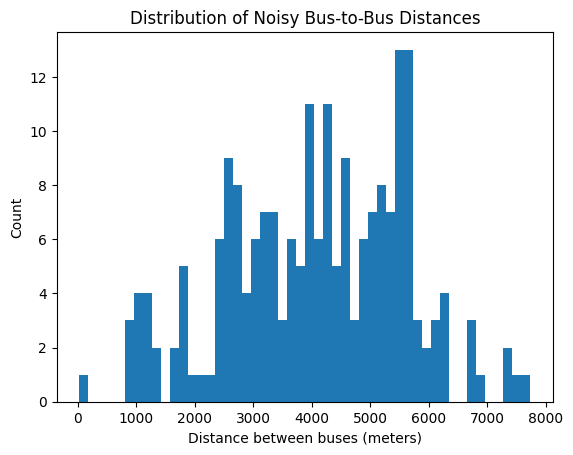

In [7]:
# 📊 Visualizing the distribution of distances
plt.hist(distance_list, bins=50)
plt.xlabel('Distance between buses (meters)')
plt.ylabel('Count')
plt.title('Distribution of Noisy Bus-to-Bus Distances')
plt.show()